<a href="https://colab.research.google.com/github/katiacardoso/AI-Analysis-of-Harry-Potter/blob/main/AI_Analysis_of_Harry_Potter_Unique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANÁLISE DE SENTIMENTOS EM PERSONAGENS DE HARRY POTTER POR MEIO DE BIBLIOTECA DE PROCESSAMENTO DE LINGUAGEM NATURAL
## *Análise realizada por Katia Cardoso*

Neste trabalho, foi realizada uma análise de sentimentos nos personagens da saga Harry Potter em seu primeiro filme, utilizando a biblioteca de Processamento de Linguagem Natural TextBlob e linguagem de programação Python a fim de analisar nuances e padrões emocionais ao longo da narrativa. Após um processo de tratamentos dos dados e implementações, os resultados demonstraram o potencial desta abordagem na análise de narrativas literárias, fornecendo insights sobre as emoções dos personagens. Essa pesquisa sugere a possibilidade para futuras investigações interdisciplinares, conectando o mundo da literatura com a tecnologia de inteligência artificial.


## Importação de bibliotecas e configuração do arquivo de log

In [425]:
#! pip uninstall nltk
#! pip install -U nltk
import nltk
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from google.colab import files
import pandas as pd
import requests
from IPython.display import Image

# Comando para exibir os gráficos inline na célula do código
%matplotlib inline

# Configurar o logger
logging.basicConfig(level=logging.DEBUG, filename='/content/logfile.log', format='%(asctime)s - %(levelname)s - %(message)s', filemode='w', force=True)




## Carregamento do arquivo de falas

In [426]:
# Carregar o arquivo de falas (nome do personagem || fala)
def load_dialogues(file_path):
    dialogues = [] # lista vazia
    with open(file_path, 'r', encoding='utf-8') as file:
      line_count = 0  # Contador de linhas
      for line in file:
        for line in file:  # Lê cada linha do arquivo
            if line_count >= 1588:  # Interrompe o loop após 10 linhas
                break
            #print("Linha lida:", line)  # Imprime a linha para depuração
            #print("n° linha:", line_count)   #botar algo para mostrar a linha apenas quando der erro
            character, sentence = line.strip().split(";")  # Divide a linha em nome do personagem e fala
            #print("Nome do personagem:", character)  # Imprime o nome do personagem para depuração
            #print("Fala:", sentence)  # Imprime a fala para depuração
            dialogues.append((character, sentence))  # Adiciona (nome, fala) à lista de diálogos
            #print(f"Personagem adicionado: {character}")
            line_count += 1  # Incrementa o contador de linhas

    return dialogues  # Retorna a lista completa de diálogos

## Analise dos sentimentos das falas

In [427]:
# Analisar sentimentos das falas
def analyze_sentiments(dialogues):
    sentiments_by_character = {} #cria um dicionario vazio
    unique_characters = set()  # Cria uma lista para personagens únicos

    for character, sentence in dialogues:
        character = character.strip()
        if character not in sentiments_by_character:
            sentiments_by_character[character] = []
            #unique_characters.add(character)  # Adiciona o personagem à lista de personagens únicos
        else:
            logging.warning(f"-------Duplicidade encontrada para o personagem: {character}")
            pass

        blob = TextBlob(sentence)
        sentiment = blob.sentiment.polarity
        sentiments_by_character[character].append(sentiment)

        '''# Imprima a lista de personagens únicos
        logging.info("Personagens únicos na lista:")
        for character in unique_characters:
            logging.info(character)'''

    return sentiments_by_character

## Visualização gráfica da evolução emocional de todos os personagens do filme

In [445]:
# Plotar gráfico da evolução emocional por personagem
def plot_emotional_evolution(sentiments_by_character):
    plt.figure(figsize=(15, 8))
    character_order = sorted(sentiments_by_character.keys())  # Cria uma lista ordenada dos personagens

    #for character, sentiments in sentiments_by_character.items():
    for character in character_order:
        sentiments = sentiments_by_character[character]
        plt.plot(sentiments, label=character)

    plt.xlabel('Número de Falas')
    plt.ylabel('Sentimento')
    plt.title('Evolução Emocional por Personagem')
    # Personalize os limites do eixo x para começar em zero
    plt.xlim(xmin=0.5)
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=8) # Ajuste ncol para o número de colunas desejado
    plt.subplots_adjust(bottom=0.01)  # Ajuste esse valor conforme necessário
    # Salve o gráfico em um arquivo externo (por exemplo, em formato PNG)
    plt.savefig('grafico_todos.png', bbox_inches='tight')
    #files.download("grafico_todos2.png")  #baixa automaticamente o gráfic
    #plt.show()
    plt.close()  # Fechar a figura para liberar memória

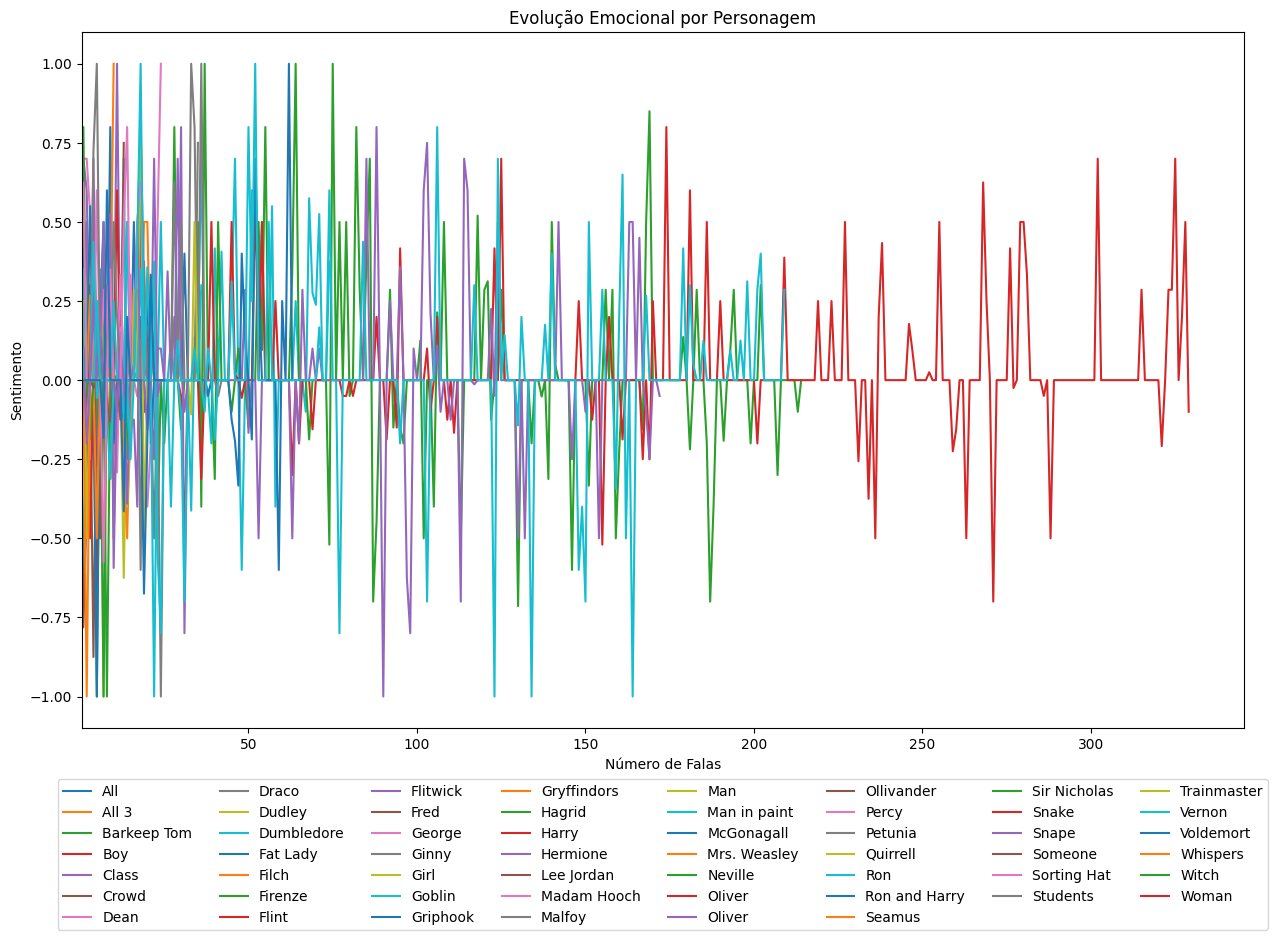

In [446]:
# Exibir a imagem com todos os personagens
Image('/content/grafico_todos.png')

## Visualização gráfica da evolução emocional dos 4 personagens com mais falas

In [443]:
def plot_individual_emotional_evolution(sentiments_by_character):
    num_personagens = len(sentiments_by_character)
    fig, axs = plt.subplots(num_personagens, 1, figsize=(10, 4*num_personagens))

    for idx, (character, sentiments) in enumerate(sentiments_by_character.items()):
        axs[idx].plot(sentiments)
        axs[idx].set(xlabel='Número de Falas', ylabel='Sentimento', title=f'Evolução Emocional de {character}')
        #axs[idx].margins(y=0.2)  # Adiciona um espaço em branco no topo de cada subplot

    # Ajusta o espaço vertical entre os subplots
    plt.subplots_adjust(hspace=0.5)  # Você pode ajustar o valor de hspace conforme necessário

    filename = 'Evolução Emocional Individual Linhas.png'
    plt.savefig(filename, bbox_inches='tight')  # Salva a figura com margens ajustadas
    plt.close()  # Fechar a figura para liberar memória
    #plt.show()  # Exibe a figura com subplots

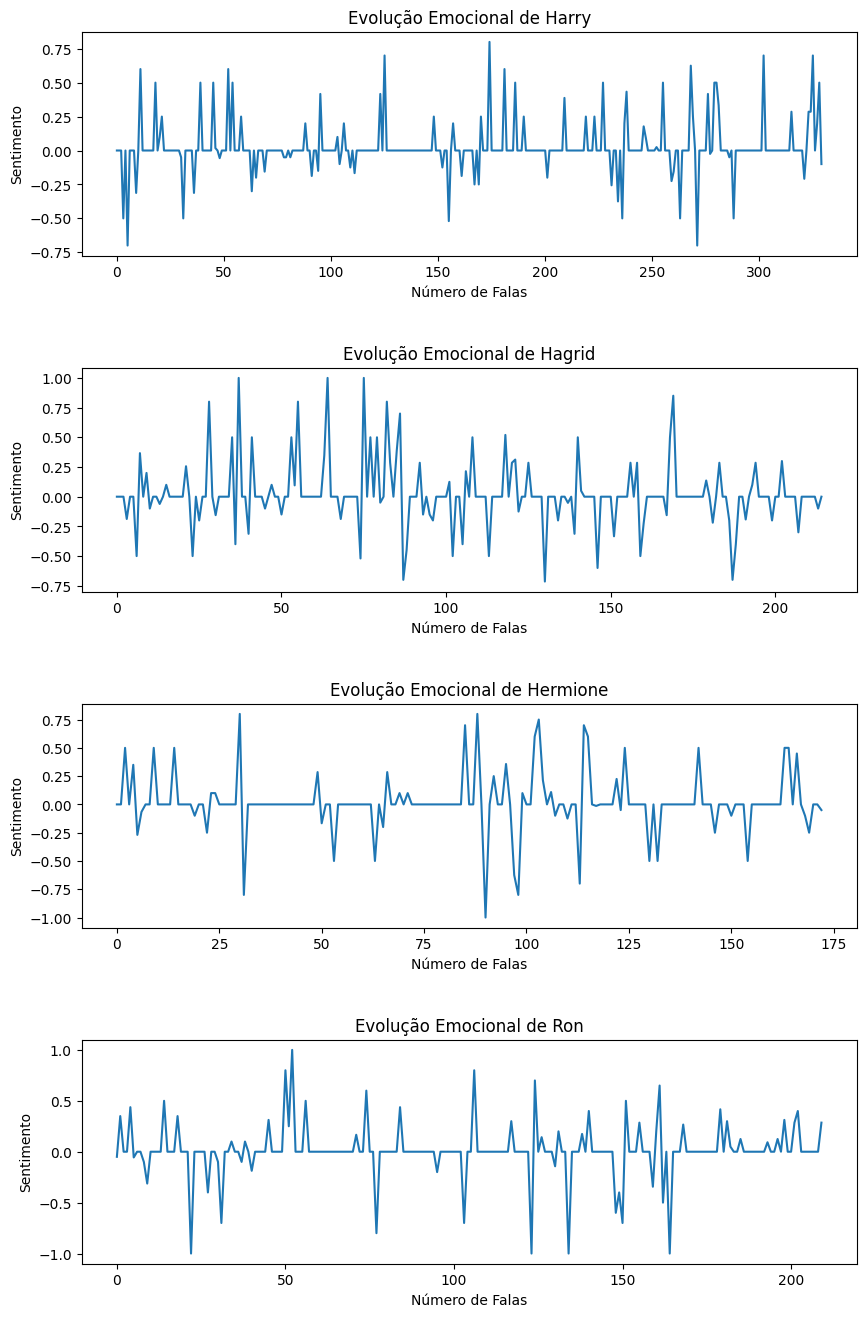

In [444]:
# Exibe a imagem usando o caminho especificado
Image('/content/Evolução Emocional Individual Linhas.png')

## Visualização gráfica da evolução dos 4 personagens com mais falas e suas frequências de falas no filme

In [440]:

def plot_emotional_evolution_top(sentiments_by_character):
    plt.figure(figsize=(15, 8))

    # Classifique os personagens com base na contagem de suas falas
    character_frequencies = [(character, len(sentiments)) for character, sentiments in sentiments_by_character.items()]
    character_frequencies.sort(key=lambda x: x[1], reverse=True)
    top_n_characters = character_frequencies[:4]


    # Gráfico de linhas
    for character, _ in top_n_characters:
        sentiments = sentiments_by_character[character]
        plt.plot(sentiments, label=character)

    plt.xlabel('Número de Falas')
    plt.ylabel('Sentimento')
    plt.title('Evolução Emocional dos Personagens com Mais Falas')
    # Personalize os limites do eixo x para começar em zero
    plt.xlim(xmin=0.5)
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=4)  # Ajuste ncol conforme necessário
    plt.subplots_adjust(bottom=0.1)  # Ajuste esse valor conforme necessário
    # Salve o gráfico em um arquivo externo (por exemplo, em formato PNG)
    plt.savefig('grafico_todos_n.png', bbox_inches='tight')
    plt.close()  # Fechar a figura para liberar memória


     # Gráfico de barras para mostrar a frequência de cada personagem
    characters, frequencies = zip(*top_n_characters)
    plt.figure(figsize=(10, 5))
    bars = plt.bar(characters, frequencies)
    plt.xlabel('Personagem')
    plt.ylabel('Frequência')
    plt.title('Frequência de Personagens ')
    plt.xticks(rotation=45)  # Rotação dos rótulos do eixo x para melhor legibilidade

    # Adicione rótulos numéricos acima de cada coluna
    for bar, frequency in zip(bars, frequencies):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, frequency + 1, str(frequency), ha='center', fontsize=10)
    # Salve o gráfico em um arquivo externo (por exemplo, em formato PNG)
    plt.savefig('grafico_frequencia_n.png', bbox_inches='tight')
   #plt.show()
    plt.close()  # Fechar a figura para liberar memória


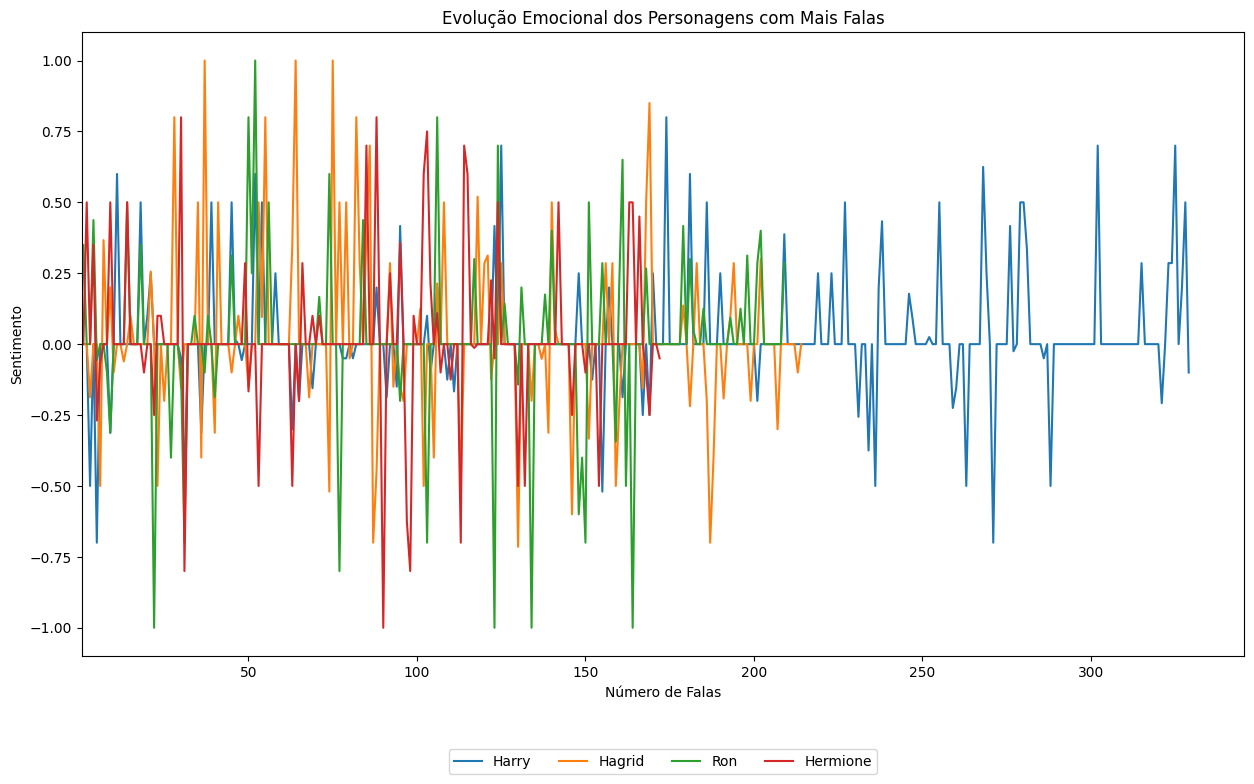

In [441]:
# Exibe a imagem usando o caminho especificado
Image('/content/grafico_todos_n.png')

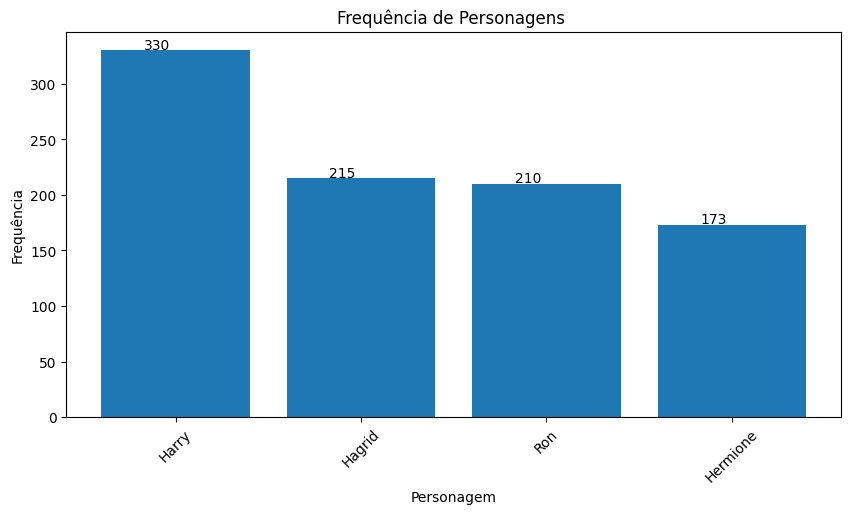

In [442]:
Image('/content/grafico_frequencia_n.png')

## Visualização gráfica da distruibuição dos sentimentos dos 4 personagens com mais falas

In [438]:
def plot_individual_emotional_histogram(sentiments_by_character):
  fig, axs = plt.subplots(len(sentiments_by_character), 1, figsize=(8, 6*len(sentiments_by_character)))

  for idx, (character, sentiments) in enumerate(sentiments_by_character.items()):
      sns.histplot(sentiments, kde=True, ax=axs[idx])
      axs[idx].set(xlabel='Sentimento', ylabel='Frequência',title=f'Distribuição de Sentimentos de {character}')

      filename =  'Evolução Emocional Individual Histograma.png'
      plt.savefig(filename, bbox_inches='tight')  # Salvar com margens ajustadas

  plt.tight_layout()  # Garante espaçamento adequado entre os subplots
  plt.close()  # Fechar a figura para liberar memória


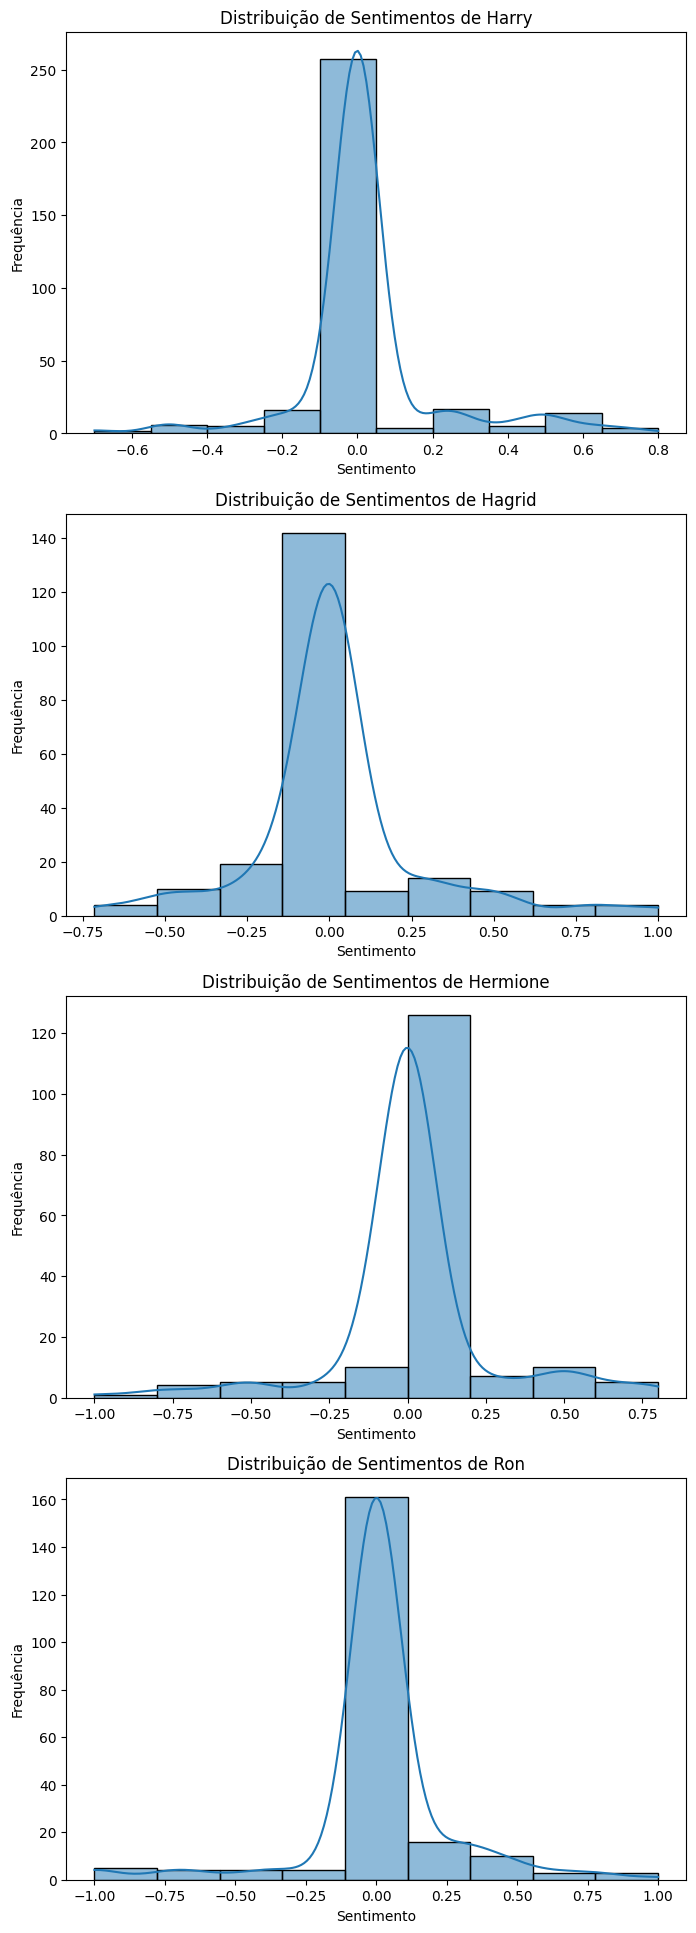

In [439]:
# Exibe a imagem usando o caminho especificado
Image('/content/Evolução Emocional Individual Histograma.png')

## Função Principal para chamada das funções

In [437]:
def main():
    #importação dos dados
    url = 'https://raw.githubusercontent.com/katiacardoso/AI-Analysis-of-Harry-Potter/main/Harry%20Potter%20111.txt'

    # Fazendo a requisição para obter o conteúdo do arquivo
    resposta = requests.get(url)

    # Verificando se a requisição foi bem-sucedida (código 200)
    if resposta.status_code == 200:
        # Lendo o conteúdo do arquivo
        conteudo_arquivo = resposta.text
        # Salvando o conteúdo em um arquivo local (opcional)
        with open('HarryPotter111.txt', 'w') as arquivo_local:
            arquivo_local.write(conteudo_arquivo)
    else:
        print('Falha ao obter o arquivo. Código de status:', resposta.status_code)
    #data.to_txt('dataset_add.csv', index=False)


    file_path = '/content/HarryPotter111.txt'
    dialogues = load_dialogues(file_path)
    sentiments_by_character = analyze_sentiments(dialogues)

    # Crie gráfico para todos os personagens
    plot_emotional_evolution(sentiments_by_character)


    # Escolha os personagens para os quais você deseja criar gráficos individuais
    characters_to_plot = ['Harry', 'Hagrid', 'Hermione', 'Ron']

    # Filtra os sentimentos para os personagens selecionados
    selected_sentiments = {character: sentiments_by_character[character] for character in characters_to_plot}

    # Crie gráficos individuais para cada personagem
    plot_individual_emotional_evolution(selected_sentiments)
    plot_individual_emotional_histogram(selected_sentiments)

    #  Crie gráfico para os personagens com maiores frequencias de fala
    plot_emotional_evolution_top(sentiments_by_character)


if __name__ == "__main__":
    main()